Name: Ankita Bera

Roll-number: 1828229

House: Ra's al Ghul

# EDA, FE, FS & Modeling Assignment

In [198]:
import pandas as pd
import datetime

In [199]:
df = pd.read_csv('H2HBABBA1533.csv')
df.head(3)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200895843,US,2019-09-09 00:00:00,2019.0,1.929776e+09,2019-08-22,20190822,20190822,20190906.0,USD,RV,1.0,NaN,41386.61,20190822.0,NAA8,1.929776e+09,0
1,U001,0200769623,WAL-MAR,2019-11-25 00:00:00,2019.0,1.930144e+09,2019-11-12,20191112,20191112,20191127.0,USD,RV,1.0,NaN,47178.82,20191112.0,NAH4,1.930144e+09,0
2,U001,0200769623,WAL-MAR foundation,2019-04-23 00:00:00,2019.0,1.929131e+09,2019-04-12,20190411,20190412,20190427.0,USD,RV,1.0,NaN,51389.52,20190412.0,NAH4,1.929131e+09,0


### Analysing the statistical measures of our data set

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           50000 non-null  float64
 5   doc_id                  50000 non-null  float64
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  float64
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  float64
 13  area_business           0 non-null      float64
 14  total_open_amount       50000 non-null

In [201]:
#Deriving the stastics of the amount that is yet to be paid for that invoice
df['total_open_amount'].describe()

count     50000.000000
mean      32133.379209
std       38865.400209
min           0.830000
25%        4867.550000
50%       17332.835000
75%       47075.895000
max      773749.610000
Name: total_open_amount, dtype: float64

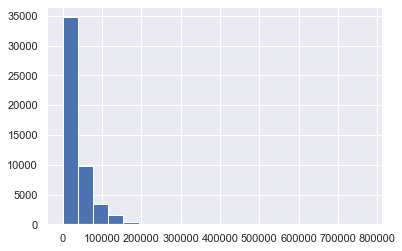

In [202]:
#Performing exploratory data analysis on the amount due for the invoice
import matplotlib.pyplot as plt
fig=df.total_open_amount.hist(bins=20)

In [203]:
df.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    4
isOpen                        0
dtype: int64

In [204]:
df.nunique()

business_code                 6
cust_number                1412
name_customer              4250
clear_date                  397
buisness_year                 2
doc_id                    48788
posting_date                502
document_create_date        506
document_create_date.1      502
due_in_date                 546
invoice_currency              2
document type                 2
posting_id                    1
area_business                 0
total_open_amount         44166
baseline_create_date        505
cust_payment_terms           73
invoice_id                48784
isOpen                        2
dtype: int64

### Dropping Constant, Quasi-constant, and Null columns

In [205]:
#Dropping primary key columns doc_id and invoice_id as they have unique values at all data points
#Dropping posting_id since it is a constant column
print(df['posting_id'].value_counts())
print(df['doc_id'].value_counts())

1.0    50000
Name: posting_id, dtype: int64
1.929807e+09    3
1.928856e+09    3
1.929868e+09    3
1.929196e+09    3
1.930828e+09    3
               ..
1.930549e+09    1
1.930214e+09    1
1.928826e+09    1
1.929491e+09    1
1.928814e+09    1
Name: doc_id, Length: 48788, dtype: int64


In [206]:
df.drop(columns=['area_business','posting_id','doc_id','invoice_id'], axis=1, inplace=True)

In [207]:
df.head(3)

,business_code,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
0,U001,0200895843,US,2019-09-09 00:00:00,2019.0,2019-08-22,20190822,20190822,20190906.0,USD,RV,41386.61,20190822.0,NAA8,0
1,U001,0200769623,WAL-MAR,2019-11-25 00:00:00,2019.0,2019-11-12,20191112,20191112,20191127.0,USD,RV,47178.82,20191112.0,NAH4,0
2,U001,0200769623,WAL-MAR foundation,2019-04-23 00:00:00,2019.0,2019-04-12,20190411,20190412,20190427.0,USD,RV,51389.52,20190412.0,NAH4,0


**Checking for quasi-constant values**

In [208]:
#Percentage of observations showing each of the different values
df['buisness_year'].value_counts()/50000

2019.0    0.69666
2020.0    0.30334
Name: buisness_year, dtype: float64

In [209]:
df['isOpen'].value_counts()/50000

0    0.8
1    0.2
Name: isOpen, dtype: float64

In [210]:
df['document type'].value_counts()/50000

RV    0.99992
X2    0.00008
Name: document type, dtype: float64

In [211]:
#dropping document type column since it is a constant column
df.drop(columns = 'document type' , inplace = True)

In [212]:
df['invoice_currency'].value_counts()/50000

USD    0.9237
CAD    0.0763
Name: invoice_currency, dtype: float64

**Convert date columns to datetime**

In [213]:
df['buisness_year']=df['buisness_year'].astype('int')

In [214]:
df['clear_date']= pd.to_datetime(df['clear_date']) 
df['due_in_date'] = pd.to_datetime(df['due_in_date'],format='%Y%m%d')

In [215]:
# Converting all the date columns into datetime format
df[['document_create_date','document_create_date.1','baseline_create_date']]=df[['document_create_date','document_create_date.1','baseline_create_date']].apply(pd.to_datetime, format='%Y%m%d')

In [216]:
# transpose the dataframe, so that the columns are the rows of the new dataframe
data_t = df.T

# check if there are duplicated rows (the columns of the original dataframe)
# this is a computionally expensive operation, so it might take a while
# sum indicates how many rows are duplicated

data_t.duplicated().sum()

0

Checking for date discrepancies

In [217]:
values1=df[df['clear_date']<df['document_create_date.1']].index

In [218]:
values1 #Anomaly in data because clear_date can't be before the document_create_date.1

Int64Index([], dtype='int64')

In [219]:
values2=df[df['due_in_date']<df['document_create_date.1']].index

In [220]:
values2 #Anomalies found in data because due_in_date can't be before the document_create_date.1

Int64Index([  346,   422,   746,   893,  1154,  1367,  1929,  2434,  3202,
             3208,
            ...
            46161, 46618, 47337, 47356, 47432, 47616, 47793, 47828, 49146,
            49500],
           dtype='int64', length=146)

In [221]:
values3=df[df['clear_date']<df['baseline_create_date']].index #Anomalies found with clear_date before baseline_date that needs to be dropped

In [222]:
values3

Int64Index([20089, 47223], dtype='int64')

In [223]:
values4=df[df['due_in_date']<df['baseline_create_date']].index

In [224]:
values4

Int64Index([], dtype='int64')

In [225]:
is_same=df['posting_date']==df['document_create_date.1']

In [226]:
is_same.value_counts() #since values are nearly same, we are going to drop this column.

True     49996
False        4
dtype: int64

Dropping rows that contain date discrepancies

In [227]:
df.drop(values2,inplace=True)

In [228]:
df.drop(values3,inplace=True)

In [229]:
df.drop(values4,inplace=True)

In [230]:
#Dropping document_create_date since we will be working on document_create_date.1
df.drop('document_create_date',axis=1,inplace=True)

In [231]:
df.drop(columns = 'posting_date' , inplace = True)

Sorting the DataFrame according to our target column

In [232]:
df = df.sort_values(['document_create_date.1'], ascending = (True))#sort the given data in terms of clear date

In [233]:
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
32625,U001,0200759878,SA corp,2019-01-15,2019,2018-12-30,2019-01-14,USD,14869.30,2018-12-30,NAH4,0
32031,U001,0200769623,WAL-MAR,2019-01-11,2019,2018-12-30,2019-01-14,USD,49677.54,2018-12-30,NAH4,0
11185,U001,0200726979,BJ'S systems,2019-01-22,2019,2018-12-30,2019-01-14,USD,16515.44,2018-12-30,NAA8,0
48522,U001,0200769623,WAL-MAR us,2019-01-10,2019,2018-12-30,2019-01-14,USD,50901.85,2018-12-30,NAH4,0
12056,U001,0200726979,BJ'S co,2019-01-15,2019,2018-12-30,2019-01-14,USD,201.39,2018-12-30,NAA8,0


### Encoding our categorical columns

In [234]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [235]:
df["business_code"]=le.fit_transform(df["business_code"])
df["name_customer"]=le.fit_transform(df["name_customer"])
df["invoice_currency"]=le.fit_transform(df["invoice_currency"])
df["cust_payment_terms"]=le.fit_transform(df["cust_payment_terms"])

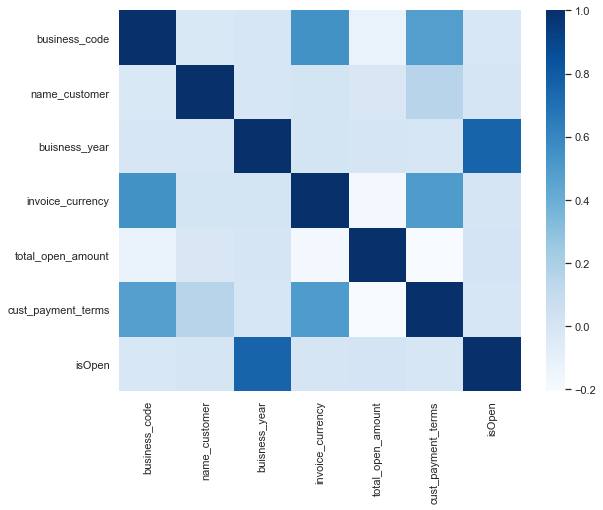

In [236]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(9, 7))
sns.heatmap(df.corr(),cmap="Blues")
sns.set()
plt.show()

Converting the currency of total open amount

In [237]:
import numpy as np
df["total_open_amount"]=np.where(df["invoice_currency"]=="USD", df["total_open_amount"],0.78*df["total_open_amount"])

In [238]:
#Dropping column invoice_currency since it is useless
df.drop('invoice_currency',axis=1,inplace=True)

### Train-Test-Validation Split

In [239]:
train=df.dropna(axis = 0, how='any')
train.reset_index(drop=True,inplace=True)

In [240]:
train.head(3)

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
0,1,0200759878,3284,2019-01-15,2019,2018-12-30,2019-01-14,11598.0540,2018-12-30,38,0
1,1,0200769623,4104,2019-01-11,2019,2018-12-30,2019-01-14,38748.4812,2018-12-30,38,0
2,1,0200726979,427,2019-01-22,2019,2018-12-30,2019-01-14,12882.0432,2018-12-30,22,0


In [241]:
test=df[df.clear_date.isnull()]

In [242]:
test.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
29647,1,0200974851,3185,NaT,2020,2020-02-27,2020-03-18,5740.4334,2020-02-27,32,1
5343,1,0200705742,1113,NaT,2020,2020-02-27,2020-03-18,63307.0230,2020-02-27,32,1
40552,1,0200762301,563,NaT,2020,2020-02-27,2020-03-13,18030.7608,2020-02-27,27,1
17456,1,0200763489,1444,NaT,2020,2020-02-27,2020-05-02,10218.7878,2020-02-27,37,1
6297,1,0200772670,245,NaT,2020,2020-02-27,2020-03-13,778.3776,2020-02-27,53,1


In [243]:
print(train['document_create_date.1'].max())
print(train['document_create_date.1'].min())

2020-02-27 00:00:00
2018-12-30 00:00:00


In [244]:
train = train.sort_values(by=["document_create_date.1"]) #sorting data by datewise on documnet create date
train.reset_index(drop=True,inplace=True)

In [245]:
X_train=train[train["document_create_date.1"]<='2019-11-28'].copy()
X_temp=train[train["document_create_date.1"]>'2019-11-28'].copy()
X_train.shape, X_temp.shape

((33045, 11), (6848, 11))

In [246]:
from sklearn.model_selection import train_test_split

In [247]:
x_val1, x_val2=train_test_split(X_temp, test_size=0.5, shuffle=False, random_state=0)
x_val1.shape, x_val2.shape

((3424, 11), (3424, 11))

### Creating columns for calculating the delay in between the dates

In [248]:
X_train['delay']=(X_train['clear_date']-X_train['due_in_date']).dt.days
X_train['delay']=X_train['delay'].astype('int')
X_train.reset_index(drop=True,inplace=True)
X_train.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay
0,1,0200759878,3284,2019-01-15,2019,2018-12-30,2019-01-14,11598.0540,2018-12-30,38,0,1
1,1,0200726979,426,2019-01-15,2019,2018-12-30,2019-01-14,25.8804,2018-12-30,22,0,1
2,1,0200769623,4114,2019-01-15,2019,2018-12-30,2019-01-14,268.3278,2018-12-30,38,0,1
3,1,0200741174,2381,2019-02-01,2019,2018-12-30,2019-01-31,17765.2800,2018-12-30,15,0,1
4,1,0200744019,3801,2019-01-18,2019,2018-12-30,2019-01-14,9346.4202,2018-12-30,22,0,4


In [249]:
import warnings
warnings.filterwarnings('ignore')

In [250]:
x_val1['delay']=(x_val1['clear_date']-x_val1['due_in_date']).dt.days
x_val1['delay']=x_val1['delay'].astype(int)
x_val2['delay']=(x_val2['clear_date']-x_val2['due_in_date']).dt.days
x_val2['delay']=x_val2['delay'].astype(int)
x_val1.reset_index(drop=True,inplace=True)
x_val1.head(3)

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay
0,1,0200744707,2912,2019-12-20,2019,2019-11-29,2019-12-31,9835.2072,2019-11-29,15,0,-11
1,1,0200759878,3289,2019-12-16,2019,2019-11-29,2019-12-14,36589.7844,2019-11-29,38,0,2
2,1,0200759878,3284,2019-12-16,2019,2019-11-29,2019-12-14,17202.0810,2019-11-29,38,0,2


In [251]:
x_val2.reset_index(drop=True,inplace=True)
x_val2.head(3)

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay
0,1,0200762301,568,2020-02-04,2020,2020-01-20,2020-02-04,5171.3376,2020-01-20,27,0,0
1,1,0200781803,2038,2020-02-10,2020,2020-01-20,2020-02-09,325.5252,2020-01-20,32,0,1
2,1,0200795490,1821,2020-02-06,2020,2020-01-20,2020-02-04,42630.9312,2020-01-20,22,0,2


In [252]:
X_train.nunique()

business_code                 6
cust_number                1283
name_customer              3647
clear_date                  298
buisness_year                 1
document_create_date.1      334
due_in_date                 367
total_open_amount         29477
baseline_create_date        341
cust_payment_terms           66
isOpen                        1
delay                       177
dtype: int64

In [253]:
X_train.head(1)

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay
0,1,0200759878,3284,2019-01-15,2019,2018-12-30,2019-01-14,11598.054,2018-12-30,38,0,1


In [254]:
test.head(1)

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
29647,1,0200974851,3185,NaT,2020,2020-02-27,2020-03-18,5740.4334,2020-02-27,32,1


In [255]:
#Dropping constant columns respresented by 1

X_train.drop(columns = 'buisness_year' , inplace = True)
X_train.drop(columns = 'isOpen' , inplace = True)
x_val1.drop(columns = 'buisness_year' , inplace = True)
x_val1.drop(columns = 'isOpen' , inplace = True)
x_val2.drop(columns = 'buisness_year' , inplace = True)
x_val2.drop(columns = 'isOpen' , inplace = True)
test.drop(columns = 'buisness_year' , inplace = True)
test.drop(columns = 'isOpen' , inplace = True)

In [256]:
X_train.shape,x_val1.shape,x_val2.shape

((33045, 10), (3424, 10), (3424, 10))

**Understanding our split data better**

2.7410559086608814


<AxesSubplot:xlabel='total_open_amount', ylabel='Density'>

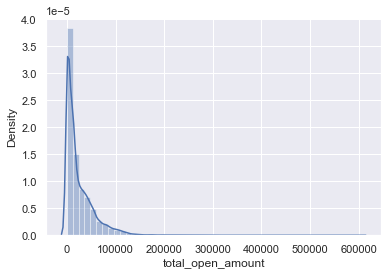

In [257]:
import seaborn as sns
print(X_train['total_open_amount'].skew())
sns.distplot(train['total_open_amount']) #We can see total_open_amount is right skewed

In [258]:
import numpy as np 

-0.9567067847259794


<AxesSubplot:xlabel='total_open_amount', ylabel='Density'>

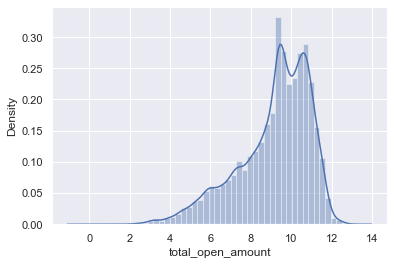

In [259]:
x = np.log(X_train['total_open_amount'])
print(x.skew())
sns.distplot(np.log(X_train['total_open_amount'])) #Skew-ness improved

0.7676522501457905


<AxesSubplot:xlabel='total_open_amount', ylabel='Density'>

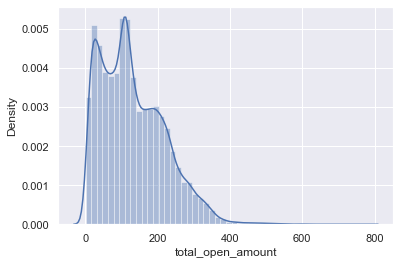

In [260]:
x1 = np.sqrt(X_train['total_open_amount'])
print(x1.skew())
sns.distplot(np.sqrt(X_train['total_open_amount'])) #Better than previous observation

-0.10288562240572625


<AxesSubplot:ylabel='Density'>

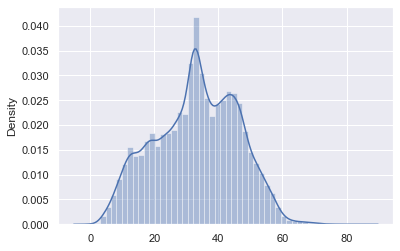

In [261]:
from scipy import stats
x2 = stats.boxcox(X_train['total_open_amount'])[0]
x3 = pd.Series(x2)
print(x3.skew())
sns.distplot(x2) #Almost resembling a Gaussian Curve

In [262]:
X_train['due_date_day']=X_train['due_in_date'].dt.day
X_train['due_date_month']=X_train['due_in_date'].dt.month
X_train['due_date_year']=X_train['due_in_date'].dt.year

In [263]:
x_val1['due_date_day']=x_val1['due_in_date'].dt.day
x_val1['due_date_month']=x_val1['due_in_date'].dt.month
x_val1['due_date_year']=x_val1['due_in_date'].dt.year

In [264]:
x_val2['due_date_day']=x_val2['due_in_date'].dt.day
x_val2['due_date_month']=x_val2['due_in_date'].dt.month
x_val2['due_date_year']=x_val2['due_in_date'].dt.year

In [265]:
test['due_date_day']=test['due_in_date'].dt.day
test['due_date_month']=test['due_in_date'].dt.month
test['due_date_year']=test['due_in_date'].dt.year

In [266]:
X_train['baseline_date_day']=X_train['baseline_create_date'].dt.day
X_train['baseline_date_month']=X_train['baseline_create_date'].dt.month
X_train['baseline_date_year']=X_train['baseline_create_date'].dt.year

In [267]:
x_val1['baseline_date_day']=x_val1['baseline_create_date'].dt.day
x_val1['baseline_date_month']=x_val1['baseline_create_date'].dt.month
x_val1['baseline_date_year']=x_val1['baseline_create_date'].dt.year

In [268]:
x_val2['baseline_date_day']=x_val2['baseline_create_date'].dt.day
x_val2['baseline_date_month']=x_val2['baseline_create_date'].dt.month
x_val2['baseline_date_year']=x_val2['baseline_create_date'].dt.year

In [269]:
test['baseline_date_day']=test['baseline_create_date'].dt.day
test['baseline_date_month']=test['baseline_create_date'].dt.month
test['baseline_date_year']=test['baseline_create_date'].dt.year

In [270]:
X_train['create_date_day']=X_train['document_create_date.1'].dt.day
X_train['create_date_month']=X_train['document_create_date.1'].dt.month
X_train['create_date_year']=X_train['document_create_date.1'].dt.year

In [271]:
x_val1['create_date_day']=x_val1['document_create_date.1'].dt.day
x_val1['create_date_month']=x_val1['document_create_date.1'].dt.month
x_val1['create_date_year']=x_val1['document_create_date.1'].dt.year

In [272]:
x_val2['create_date_day']=x_val2['document_create_date.1'].dt.day
x_val2['create_date_month']=x_val2['document_create_date.1'].dt.month
x_val2['create_date_year']=x_val2['document_create_date.1'].dt.year

In [273]:
test['create_date_day']=test['document_create_date.1'].dt.day
test['create_date_month']=test['document_create_date.1'].dt.month
test['create_date_year']=test['document_create_date.1'].dt.year

In [274]:
X_train.head(3)

,business_code,cust_number,name_customer,clear_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,delay,due_date_day,due_date_month,due_date_year,baseline_date_day,baseline_date_month,baseline_date_year,create_date_day,create_date_month,create_date_year
0,1,0200759878,3284,2019-01-15,2018-12-30,2019-01-14,11598.0540,2018-12-30,38,1,14,1,2019,30,12,2018,30,12,2018
1,1,0200726979,426,2019-01-15,2018-12-30,2019-01-14,25.8804,2018-12-30,22,1,14,1,2019,30,12,2018,30,12,2018
2,1,0200769623,4114,2019-01-15,2018-12-30,2019-01-14,268.3278,2018-12-30,38,1,14,1,2019,30,12,2018,30,12,2018


In [275]:
X_train.reset_index(drop=True,inplace=True)

In [276]:
X_train.shape

(33045, 19)

In [277]:
x_val1.reset_index(drop=True,inplace=True)

In [278]:
x_val1.shape

(3424, 19)

In [279]:
x_val2.reset_index(drop=True,inplace=True)

In [280]:
x_val2.shape

(3424, 19)

In [281]:
test.shape

(9959, 18)

In [282]:
X_train.head(1)

,business_code,cust_number,name_customer,clear_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,delay,due_date_day,due_date_month,due_date_year,baseline_date_day,baseline_date_month,baseline_date_year,create_date_day,create_date_month,create_date_year
0,1,0200759878,3284,2019-01-15,2018-12-30,2019-01-14,11598.054,2018-12-30,38,1,14,1,2019,30,12,2018,30,12,2018


In [283]:
x_val2.head(1)#index missing due to some reason

,business_code,cust_number,name_customer,clear_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,delay,due_date_day,due_date_month,due_date_year,baseline_date_day,baseline_date_month,baseline_date_year,create_date_day,create_date_month,create_date_year
0,1,0200762301,568,2020-02-04,2020-01-20,2020-02-04,5171.3376,2020-01-20,27,0,4,2,2020,20,1,2020,20,1,2020


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='total_open_amount', ylabel='delay'>

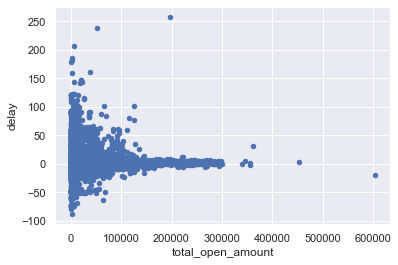

In [284]:
X_train.plot(x="total_open_amount", y="delay", kind="scatter")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='total_open_amount', ylabel='delay'>

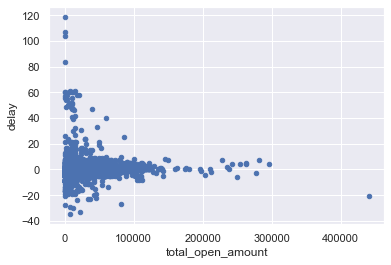

In [285]:
x_val1.plot(x="total_open_amount", y="delay", kind="scatter")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='total_open_amount', ylabel='delay'>

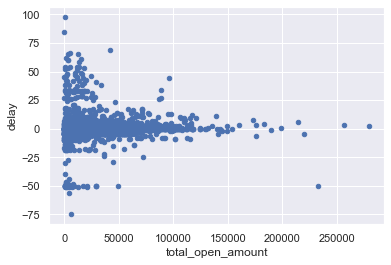

In [286]:
x_val2.plot(x="total_open_amount", y="delay", kind="scatter")

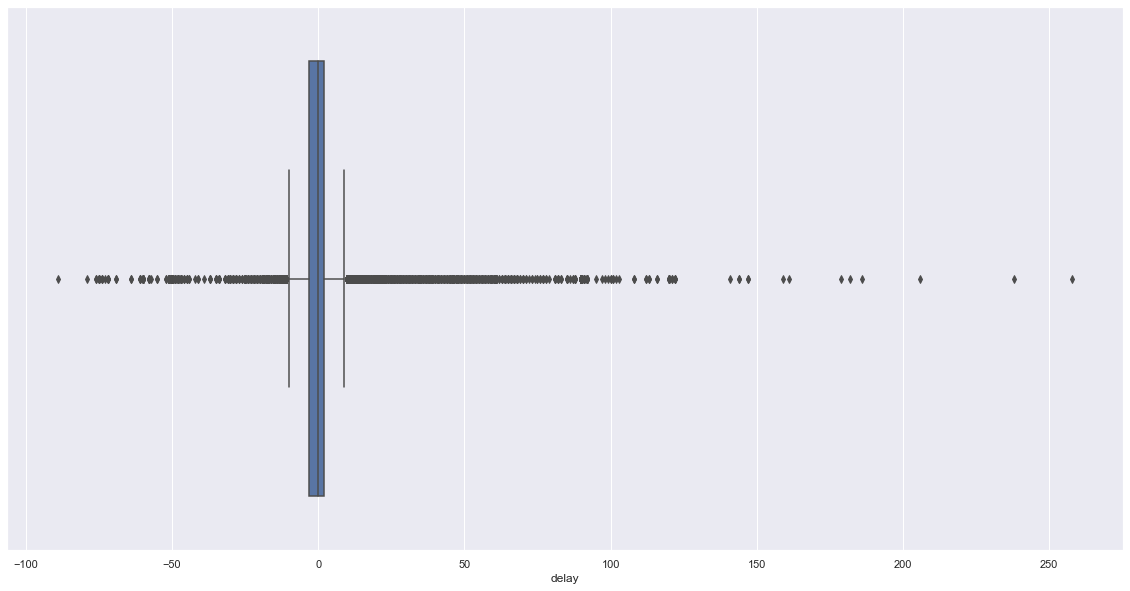

In [287]:
plt.figure(figsize=(20,10))
sns.boxplot(X_train['delay'])
plt.show()

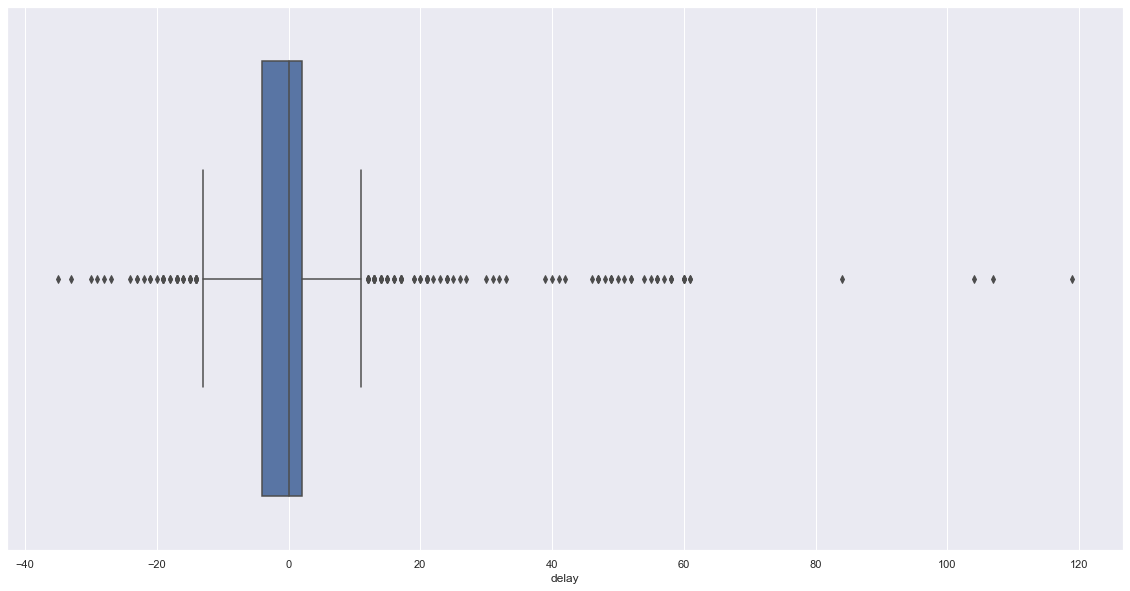

In [288]:
plt.figure(figsize=(20,10))
sns.boxplot(x_val1['delay'])
plt.show()

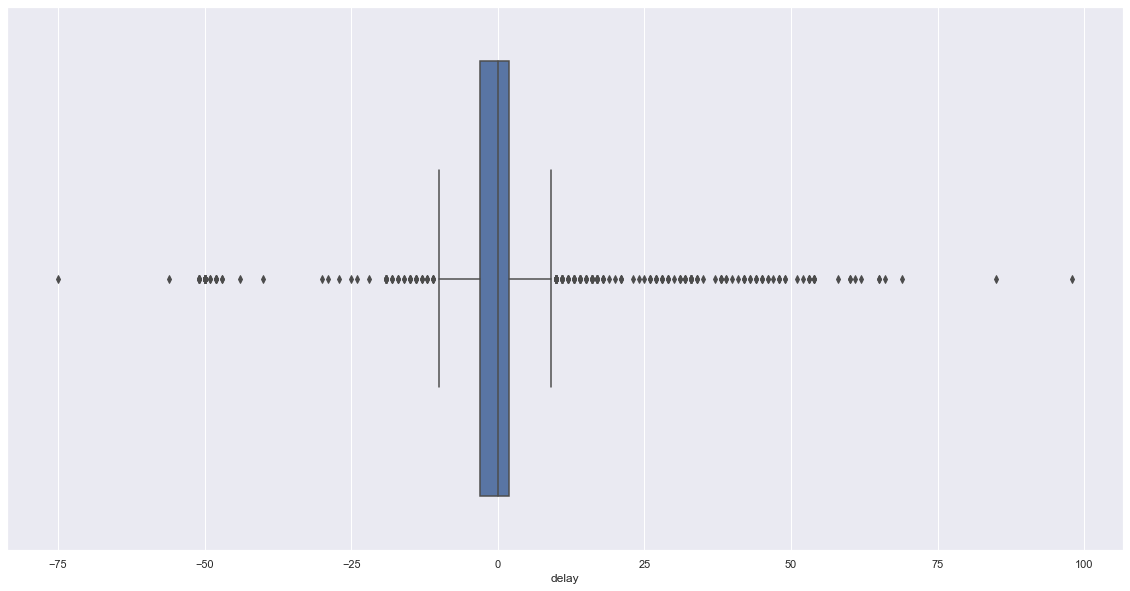

In [289]:
plt.figure(figsize=(20,10))
sns.boxplot(x_val2['delay'])
plt.show()

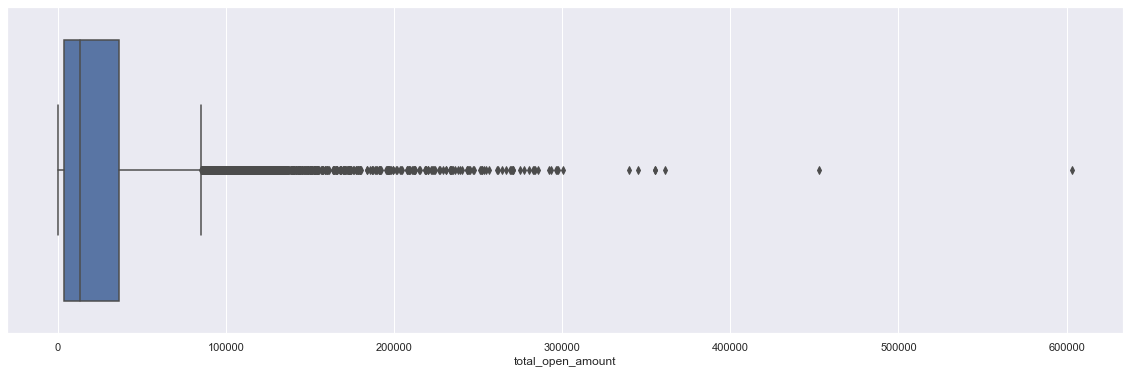

In [290]:
plt.figure(figsize=(20,6))
sns.boxplot(X_train['total_open_amount'])
plt.show()

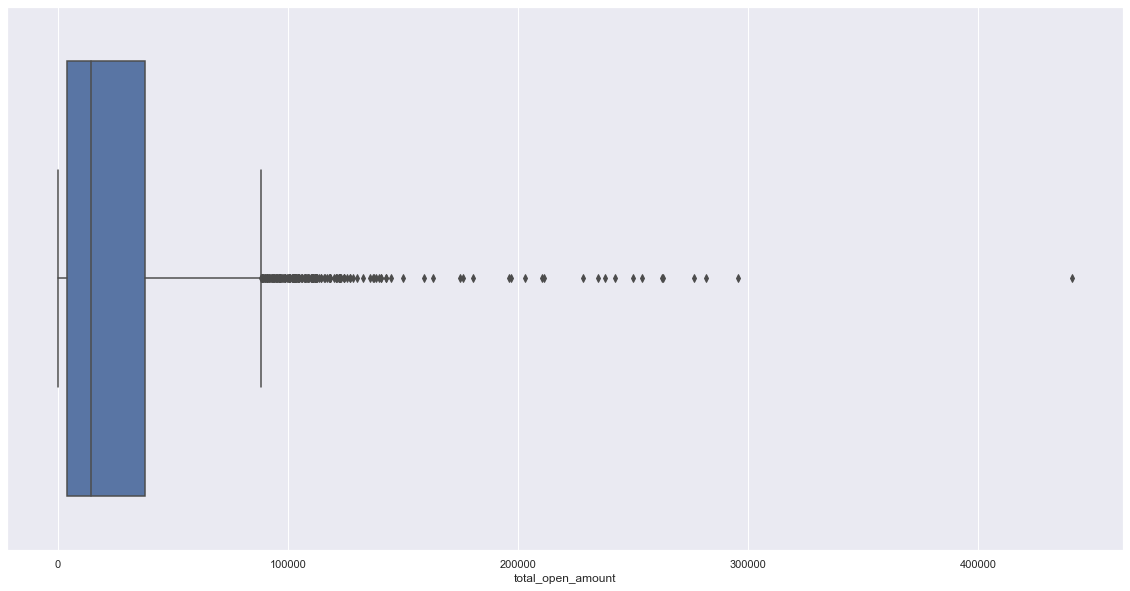

In [291]:
plt.figure(figsize=(20,10))
sns.boxplot(x_val1['total_open_amount'])
plt.show()

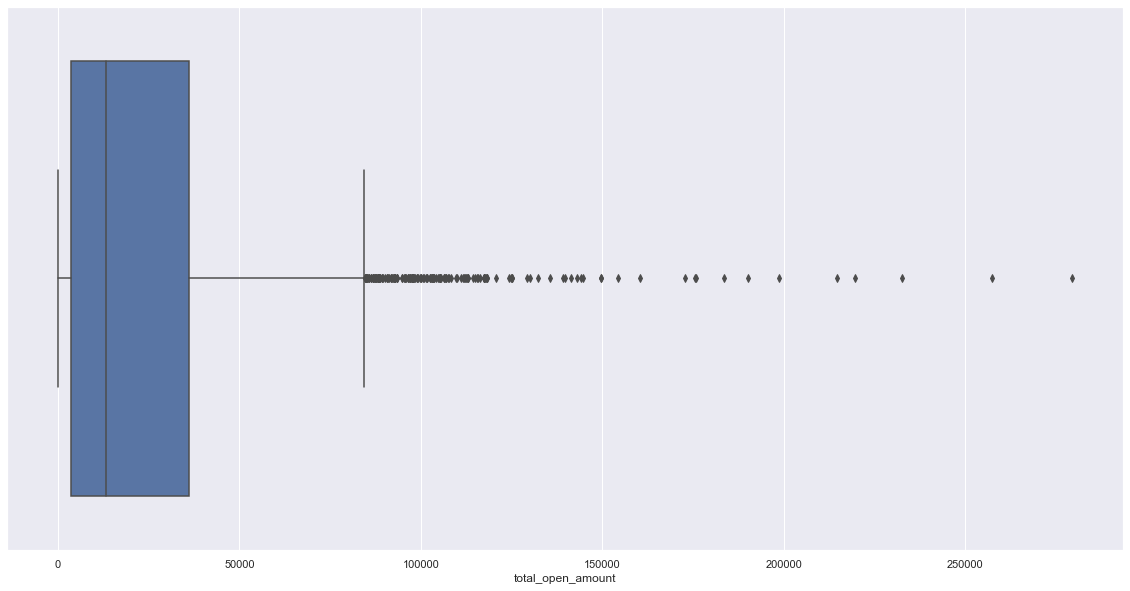

In [292]:
plt.figure(figsize=(20,10))
sns.boxplot(x_val2['total_open_amount'])
plt.show()

The above plots show that total_open_amount and delay columns has a lot of outliers.

### IQR Treatment

In [293]:
upper_lim1=X_train['total_open_amount'].quantile(0.99) 
print(upper_lim1)

129781.07656800018


In [294]:
upper_lim2=x_val1['total_open_amount'].quantile(0.99) 
print(upper_lim2)

129523.10178599998


In [295]:
upper_lim3=x_val2['total_open_amount'].quantile(0.99) 
print(upper_lim3)

117534.530724


In [296]:
upper_lim4=test['total_open_amount'].quantile(0.99) 
print(upper_lim4)

118531.13298000004


In [297]:
X_train.loc[(X_train['total_open_amount']>upper_lim1),'total_open_amount']=upper_lim1

In [298]:
x_val1.loc[(x_val1['total_open_amount']>upper_lim2),'total_open_amount']=upper_lim2

In [299]:
x_val2.loc[(x_val2['total_open_amount']>upper_lim3),'total_open_amount']=upper_lim3

In [300]:
test.loc[(test['total_open_amount']>upper_lim4),'total_open_amount']=upper_lim4

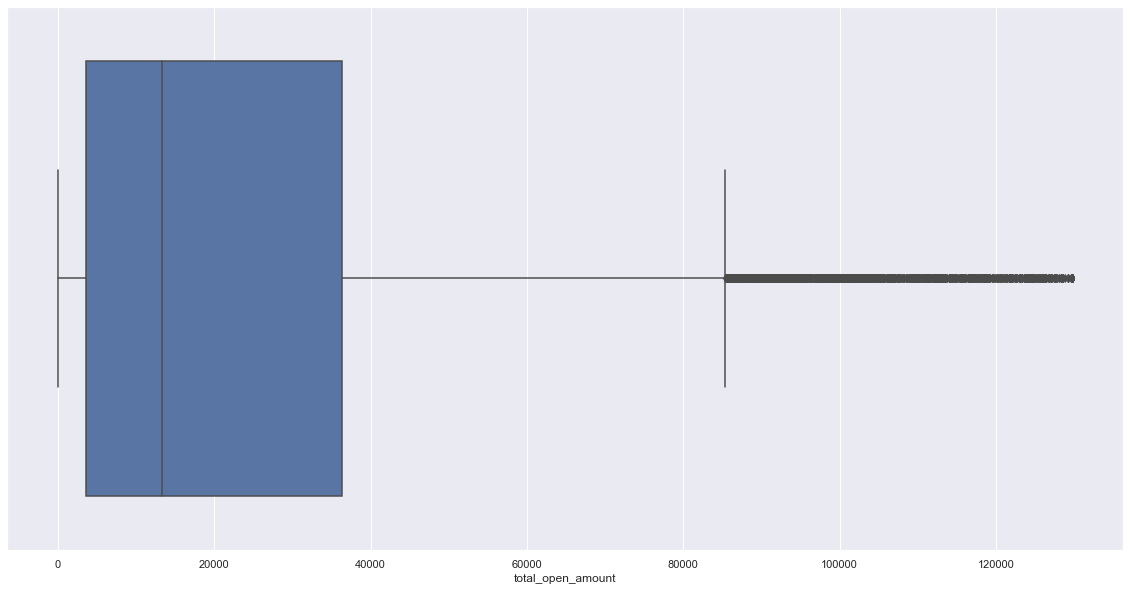

In [301]:
plt.figure(figsize=(20,10))
sns.boxplot(X_train['total_open_amount'])
plt.show()

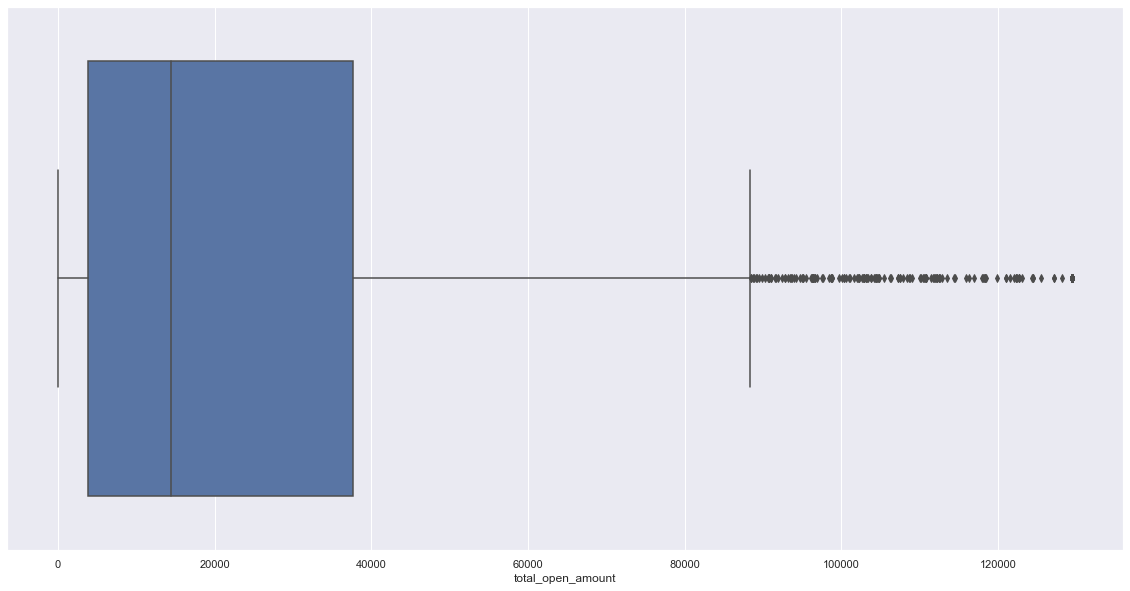

In [302]:
plt.figure(figsize=(20,10))
sns.boxplot(x_val1['total_open_amount'])
plt.show()

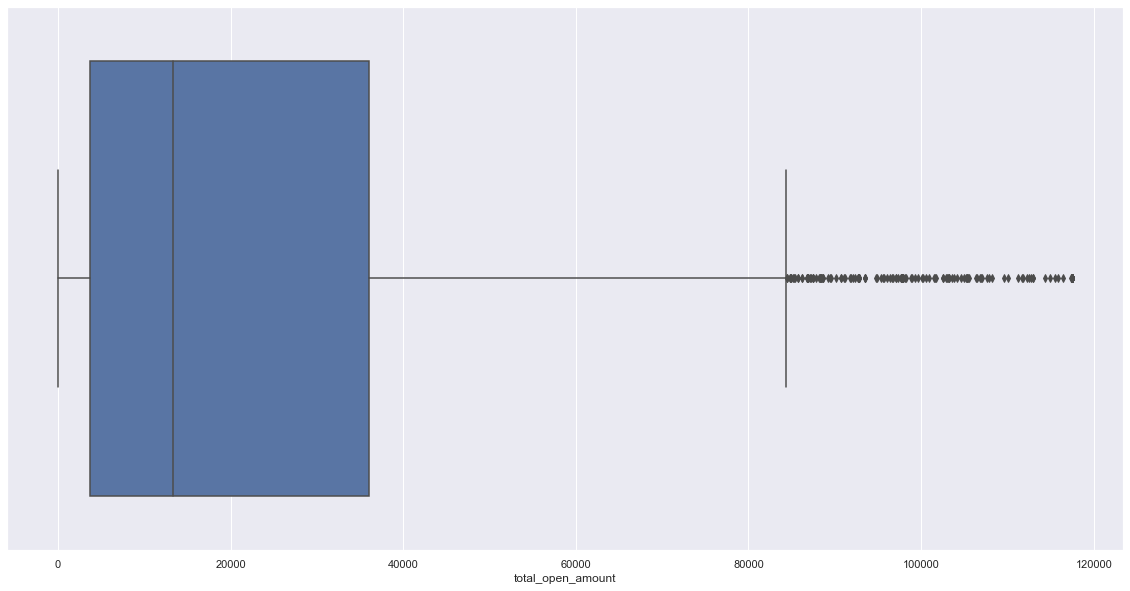

In [303]:
plt.figure(figsize=(20,10))
sns.boxplot(x_val2['total_open_amount'])
plt.show()

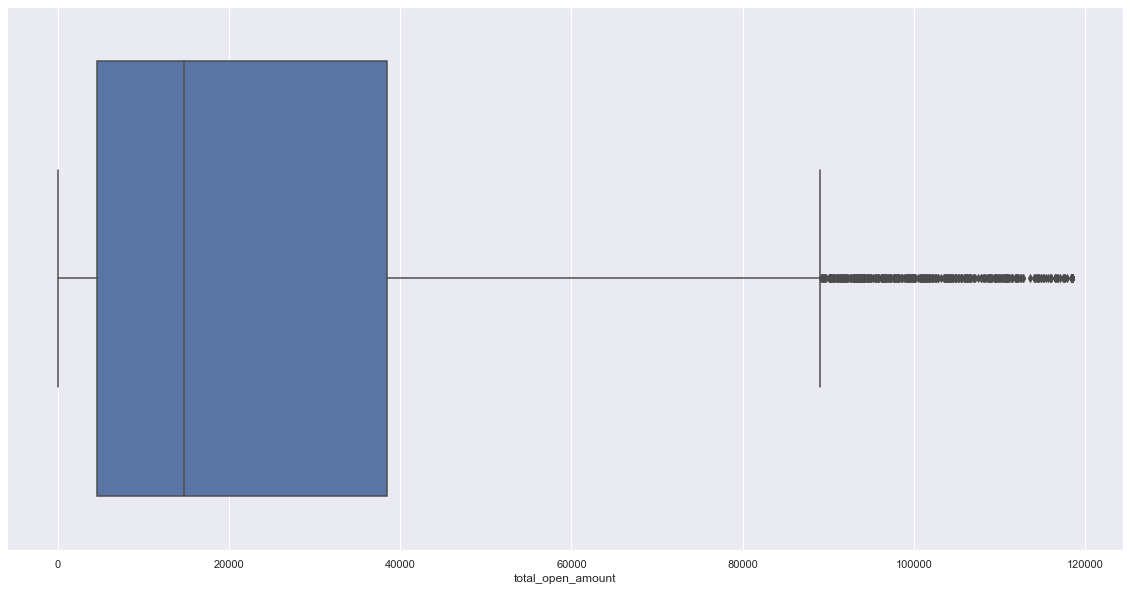

In [304]:
plt.figure(figsize=(20,10))
sns.boxplot(test['total_open_amount'])
plt.show()

In [305]:
upper_lim=X_train['delay'].quantile(0.94) #IQR treatment  of target
lower_lim=X_train['delay'].quantile(0.05)
print(upper_lim)
print(lower_lim)

9.0
-7.0


In [306]:
upper_lim2=x_val1['delay'].quantile(0.94) #IQR treatment  of target
lower_lim2=x_val1['delay'].quantile(0.05)
print(upper_lim2)
print(lower_lim2)

6.0
-8.0


In [307]:
upper_lim3=x_val2['delay'].quantile(0.94) #IQR treatment  of target
lower_lim3=x_val2['delay'].quantile(0.05)
print(upper_lim3)
print(lower_lim3)

8.0
-8.0


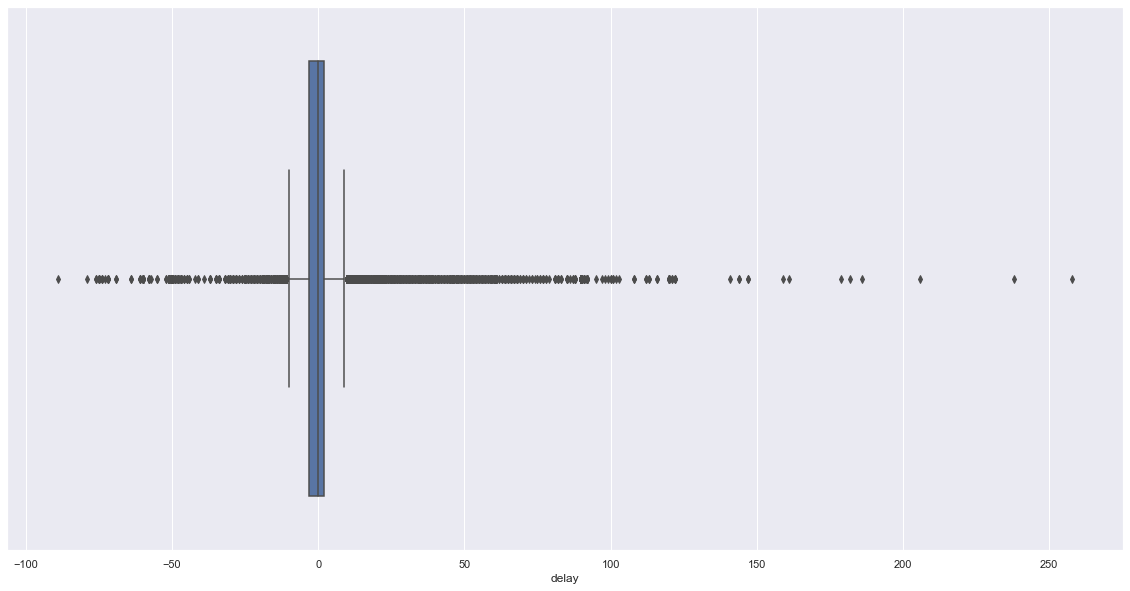

In [308]:
plt.figure(figsize=(20,10))
sns.boxplot(X_train['delay'])
plt.show()

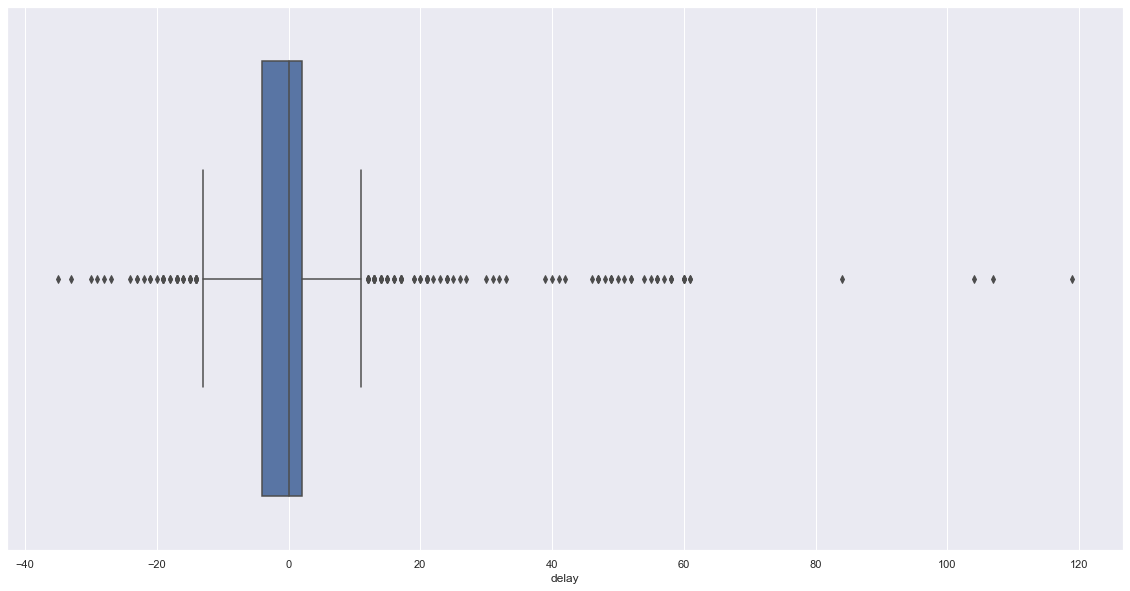

In [309]:
plt.figure(figsize=(20,10))
sns.boxplot(x_val1['delay'])
plt.show()

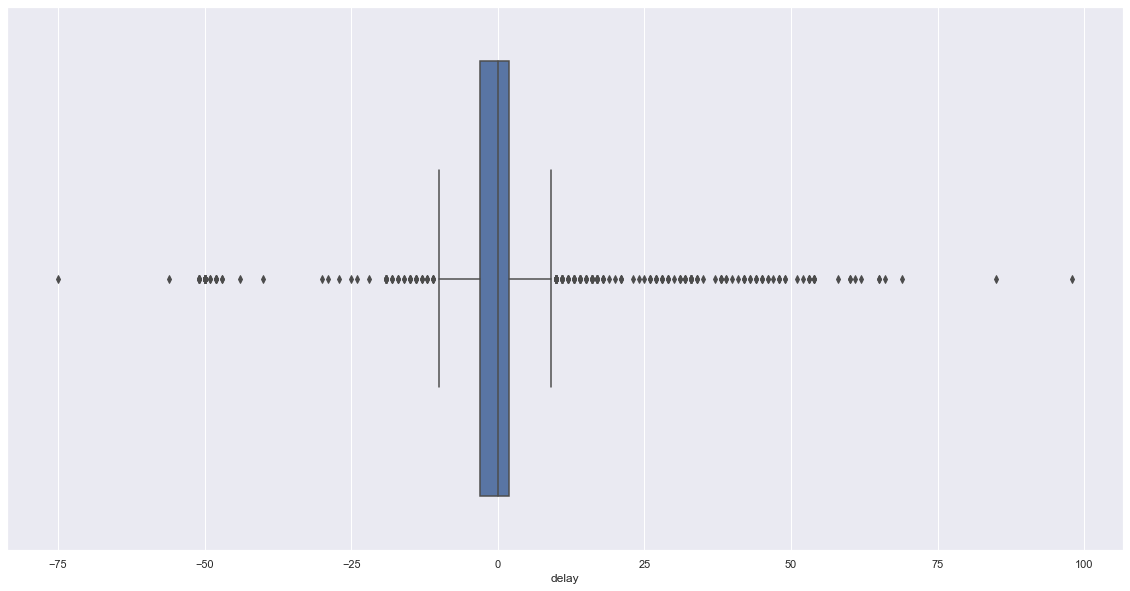

In [310]:
plt.figure(figsize=(20,10))
sns.boxplot(x_val2['delay'])
plt.show()

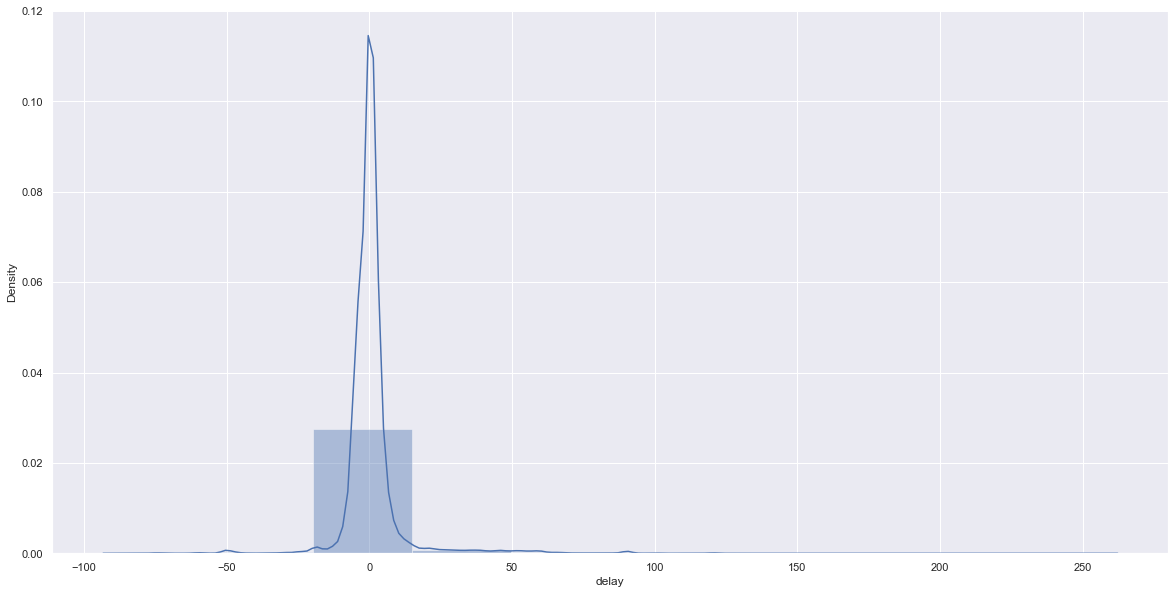

In [311]:
plt.figure(figsize=(20,10))   #Distribution Curve for X_train
sns.distplot(X_train['delay'], bins=10)
plt.show()

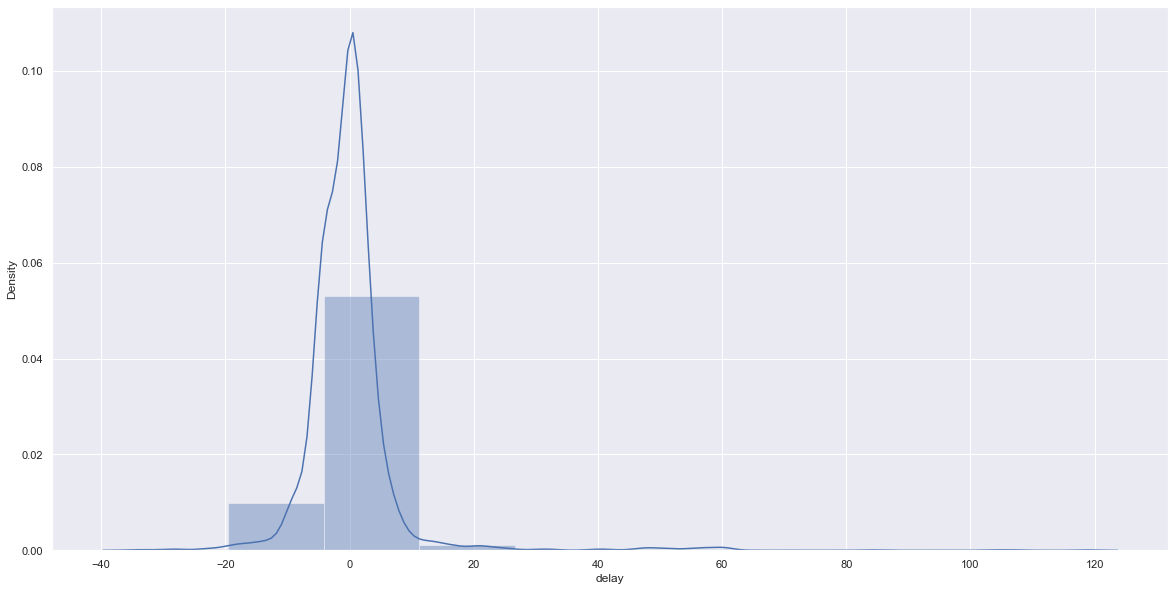

In [312]:
plt.figure(figsize=(20,10))   #Distribution Curve for x_val1
sns.distplot(x_val1['delay'], bins=10)
plt.show()

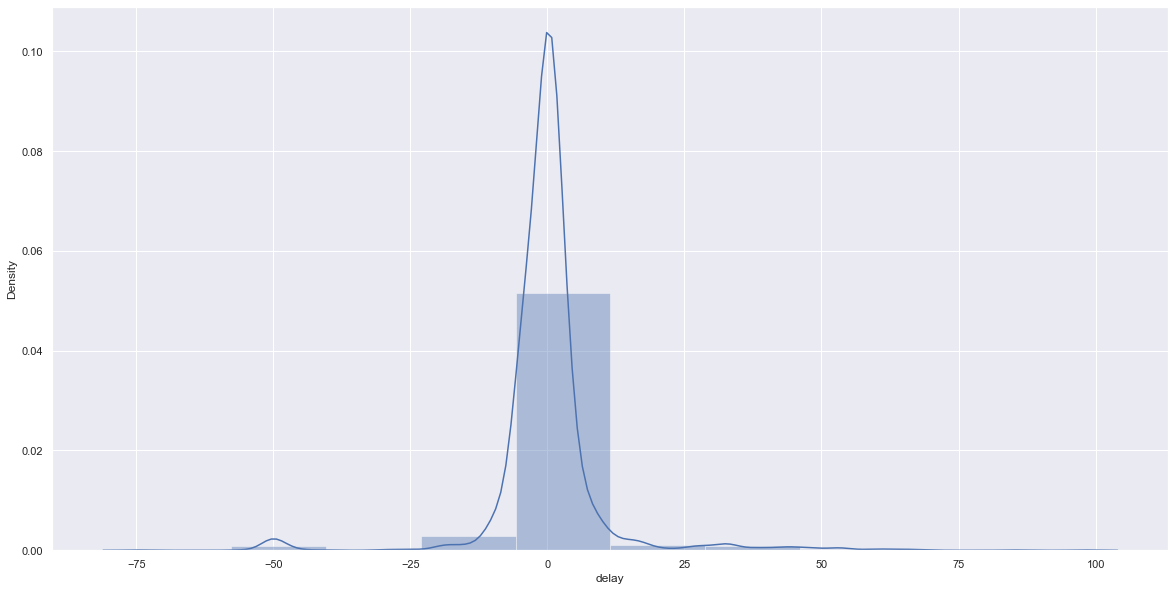

In [313]:
plt.figure(figsize=(20,10))   #Distribution Curve for x_val2
sns.distplot(x_val2['delay'], bins=10)
plt.show()

**Generating new columns for our data**

In [314]:
groupdata=X_train.groupby('name_customer')['delay'].agg('mean') # to see how much avg delay a customer can do
avg_delay=groupdata.to_frame()
avg_delay

,delay
name_customer,
0,14.5
1,-10.0
2,7.0
3,0.0
4,-3.0
...,...
4242,-0.5
4243,0.0
4244,-9.0


In [315]:
groupdata2=x_val1.groupby('name_customer')['delay'].agg('mean') # to see how much avg delay a customer can do
avg_delay2=groupdata2.to_frame()
avg_delay2

,delay
name_customer,
2,-1.0
32,12.0
71,1.0
74,1.0
75,1.0
...,...
4203,0.0
4228,0.0
4237,0.0


In [316]:
groupdata3=x_val2.groupby('name_customer')['delay'].agg('mean') # to see how much avg delay a customer can do
avg_delay3=groupdata3.to_frame()
avg_delay3

,delay
name_customer,
11,4.0
18,1.0
50,-2.5
54,-2.0
70,4.0
...,...
4197,0.0
4198,3.0
4199,1.4


In [317]:
for i in groupdata.index:
  X_train.loc[X_train.name_customer==i, "avg_cust_delay"] = avg_delay['delay'][i]

In [318]:
for i in groupdata2.index:
  x_val1.loc[x_val1.name_customer==i, "avg_cust_delay"] = avg_delay2['delay'][i]

In [319]:
for i in groupdata3.index:
  x_val2.loc[x_val2.name_customer==i, "avg_cust_delay"] = avg_delay3['delay'][i]

In [320]:
temp=X_train.groupby('due_date_month')['delay'].agg({"mean","median","count",np.max,np.min})
temp

,count,amin,mean,amax,median
due_date_month,,,,,
1,1373,-31,2.450838,121,0
2,2527,-75,1.557182,206,0
3,3081,-48,1.860110,258,0
4,3187,-55,0.897082,238,0
5,3331,-58,1.150705,182,0
6,3004,-89,0.559587,144,0
7,3106,-50,1.529298,112,0
8,2951,-74,1.329041,147,0
9,2958,-76,1.160920,91,0


In [321]:
temp2=x_val1.groupby('due_date_month')['delay'].agg({"mean","median","count",np.max,np.min})
temp2

,count,amin,mean,amax,median
due_date_month,,,,,
1,1566,-33,0.111111,119,0
2,322,-28,1.344720,84,0
3,9,-3,7.000000,21,5
4,2,-35,-31.000000,-27,-31
11,4,21,21.000000,21,21
12,1521,-18,-0.512821,61,0


In [322]:
temp3=x_val2.groupby('due_date_month')['delay'].agg({"mean","median","count",np.max,np.min})
temp3

,count,amin,mean,amax,median
due_date_month,,,,,
1,39,0,14.410256,37,5
2,2118,-30,0.889046,98,0
3,1133,-29,0.200353,69,0
4,120,-75,-17.525000,25,0
5,13,-51,-13.461538,3,-1
6,1,-15,-15.000000,-15,-15


In [323]:
for i in temp.index:
    X_train.loc[X_train['due_date_month']==i, "dueDateWise_avg_monthly_delay_"] = temp['mean'][i]
X_train.shape

(33045, 21)

In [324]:
for i in temp2.index:
    x_val1.loc[X_train['due_date_month']==i, "dueDateWise_avg_monthly_delay_"] = temp['mean'][i]
x_val1.shape

(3424, 21)

In [325]:
for i in temp3.index:
    x_val2.loc[X_train['due_date_month']==i, "dueDateWise_avg_monthly_delay_"] = temp['mean'][i]
x_val2.shape

(3424, 21)

**Binning our data**

In [326]:
X_train['amount_bins'] = pd.qcut(X_train['total_open_amount'],q=4,labels=[1,2,3,4])

In [327]:
x_val1['amount_bins'] = pd.qcut(x_val1['total_open_amount'],q=4,labels=[1,2,3,4])
x_val2['amount_bins'] = pd.qcut(x_val2['total_open_amount'],q=4,labels=[1,2,3,4])

In [328]:
X_train['amount_bins'].head()

0    2
1    1
2    1
3    3
4    2
Name: amount_bins, dtype: category
Categories (4, int64): [1 < 2 < 3 < 4]

In [329]:
X_train.shape

(33045, 22)

In [330]:
x_val1.shape

(3424, 22)

In [331]:
x_val2.shape

(3424, 22)

In [332]:
test.shape

(9959, 18)

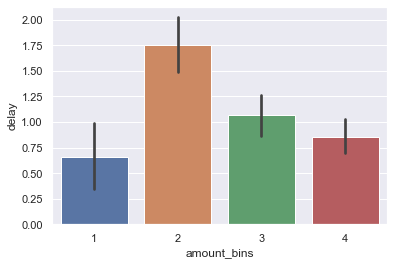

In [333]:
sns.barplot(x='amount_bins',y='delay',data=X_train)
sns.set()

**Exploring various aspects of our data**

<AxesSubplot:xlabel='business_code', ylabel='count'>

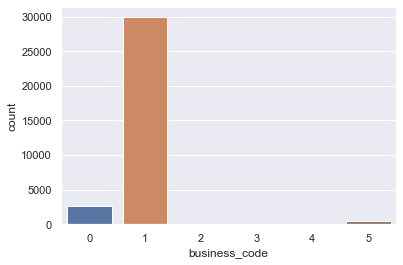

In [334]:
sns.countplot(x='business_code', data=X_train) #business_code 1 has maximum number of occurences in buisness code

<AxesSubplot:xlabel='business_code', ylabel='delay'>

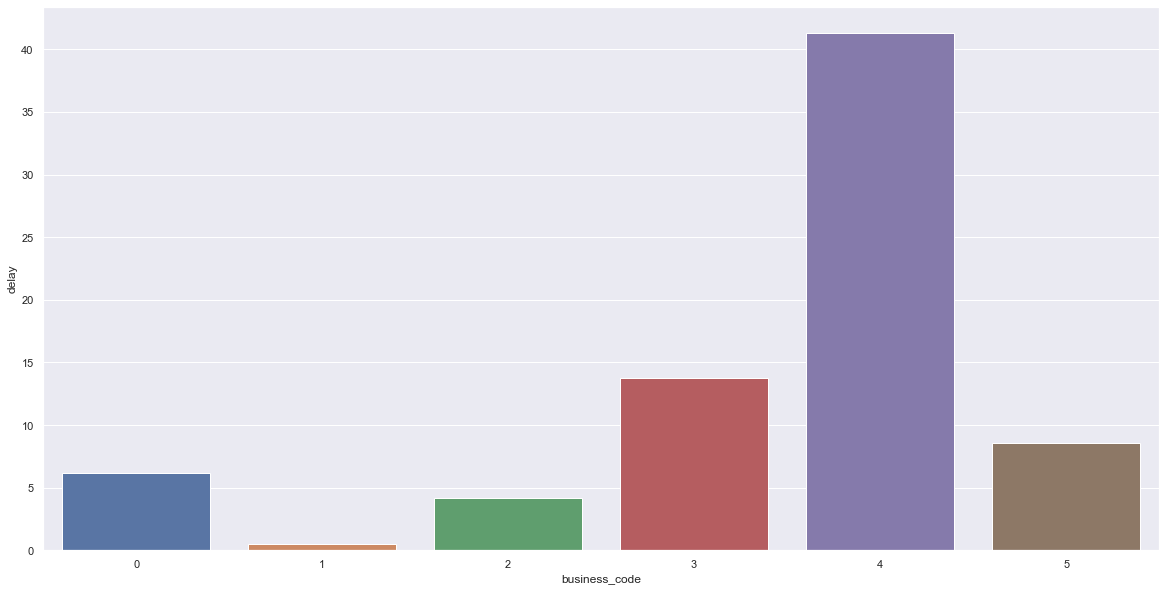

In [335]:
plt.figure(figsize=(20,10))
temp1=pd.DataFrame(X_train.groupby('business_code')['delay'].mean())
sns.barplot(x=temp1.index,y='delay',data=temp1) #business_code 3 have highest mean of delay

**Creating more columns for futher analysis.**

In [336]:
d = X_train.groupby('business_code')['delay'].mean().to_dict()

In [337]:
X_train['bcode_avg_delay'] = X_train['business_code'].map(d)
x_val1['bcode_avg_delay'] = X_train['business_code'].map(d)
x_val2['bcode_avg_delay'] = X_train['business_code'].map(d)

**Checking correlation between columns**

In [338]:
X_train.corr()

,business_code,name_customer,total_open_amount,cust_payment_terms,delay,due_date_day,due_date_month,due_date_year,baseline_date_day,baseline_date_month,baseline_date_year,create_date_day,create_date_month,create_date_year,avg_cust_delay,dueDateWise_avg_monthly_delay_,bcode_avg_delay
business_code,1.000000,-0.025355,-0.102167,0.474280,0.002329,0.009717,0.009837,0.007878,-0.003524,-0.017506,-0.014122,-0.001404,-0.014378,-0.008289,-0.005170,-0.016783,0.014732
name_customer,-0.025355,1.000000,-0.015438,0.133443,-0.016412,-0.000034,-0.007478,-0.003059,0.026685,0.000341,-0.010945,-0.000932,0.000821,-0.012111,-0.022420,0.005661,-0.035524
total_open_amount,-0.102167,-0.015438,1.000000,-0.192618,-0.002462,-0.014202,0.007114,-0.001702,0.036628,0.011800,0.004709,0.018433,0.011254,0.002441,0.001536,-0.007268,0.104443
cust_payment_terms,0.474280,0.133443,-0.192618,1.000000,0.074069,0.006616,0.032598,-0.012002,-0.029280,0.006339,-0.016542,-0.004769,0.009141,-0.011657,0.148207,-0.033175,-0.269400
delay,0.002329,-0.016412,-0.002462,0.074069,1.000000,-0.006826,-0.040173,-0.068698,0.000933,-0.021436,-0.010508,-0.012364,-0.022256,-0.010938,0.732031,0.055154,0.158088
due_date_day,0.009717,-0.000034,-0.014202,0.006616,-0.006826,1.000000,-0.099411,-0.030835,-0.367820,0.023660,0.000523,-0.373262,0.023760,0.002232,0.002679,0.154144,-0.008603
due_date_month,0.009837,-0.007478,0.007114,0.032598,-0.040173,-0.099411,1.000000,-0.039062,0.089979,0.958041,0.094223,0.085883,0.957227,0.096203,-0.016718,-0.728383,0.001663
due_date_year,0.007878,-0.003059,-0.001702,-0.012002,-0.068698,-0.030835,-0.039062,1.000000,0.007465,0.012397,0.114329,0.006997,0.012420,0.112400,-0.037410,0.049175,0.007239
baseline_date_day,-0.003524,0.026685,0.036628,-0.029280,0.000933,-0.367820,0.089979,0.007465,1.000000,-0.012293,-0.098384,0.950235,-0.009681,-0.092369,0.027293,-0.115302,0.011264
baseline_date_month,-0.017506,0.000341,0.011800,0.006339,-0.021436,0.023660,0.958041,0.012397,-0.012293,1.000000,-0.113214,-0.013063,0.998403,-0.106223,-0.006843,-0.669388,0.001514


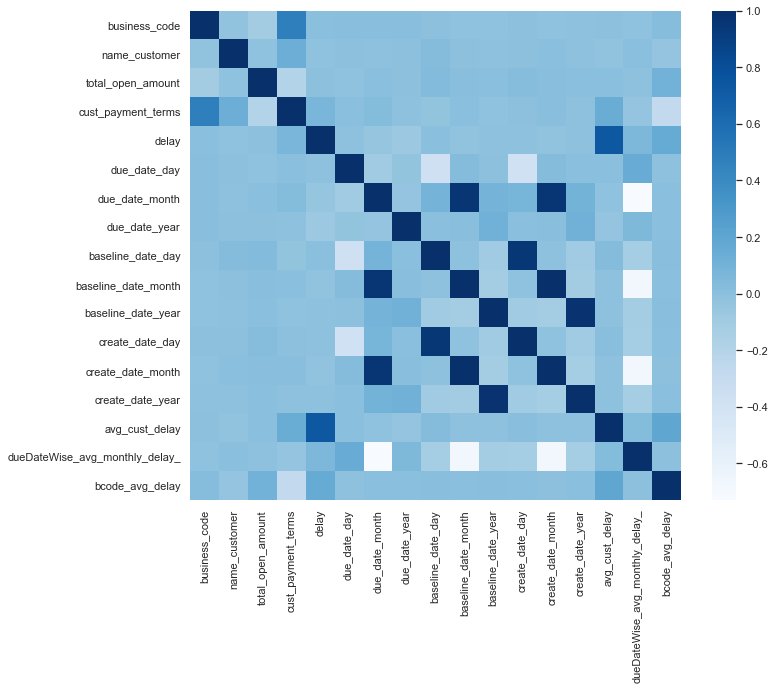

In [339]:
fig, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(X_train.corr(),cmap="Blues")
plt.show()

**Dropping columns with high correlation**

In [340]:
#due_date_month has high correlation with baseline date month and create date month
#dropping these columns
X_train.drop(columns = ["baseline_date_month","create_date_month"], inplace = True)
X_train.reset_index(inplace=True, drop=True)

In [341]:
x_val1.drop(columns = ["baseline_date_month","create_date_month"], inplace = True)
x_val1.reset_index(inplace=True, drop=True)

In [342]:
x_val2.drop(columns = ["baseline_date_month","create_date_month"], inplace = True)
x_val2.reset_index(inplace=True)

In [343]:
test.drop(columns = ["baseline_date_month","create_date_month"], inplace = True)
test.reset_index(inplace=True)

In [344]:
X_train.head()

,business_code,cust_number,name_customer,clear_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,delay,...,due_date_month,due_date_year,baseline_date_day,baseline_date_year,create_date_day,create_date_year,avg_cust_delay,dueDateWise_avg_monthly_delay_,amount_bins,bcode_avg_delay
0,1,0200759878,3284,2019-01-15,2018-12-30,2019-01-14,11598.0540,2018-12-30,38,1,...,1,2019,30,2018,30,2018,1.303571,2.450838,2,0.519311
1,1,0200726979,426,2019-01-15,2018-12-30,2019-01-14,25.8804,2018-12-30,22,1,...,1,2019,30,2018,30,2018,0.788732,2.450838,1,0.519311
2,1,0200769623,4114,2019-01-15,2018-12-30,2019-01-14,268.3278,2018-12-30,38,1,...,1,2019,30,2018,30,2018,-2.171470,2.450838,1,0.519311
3,1,0200741174,2381,2019-02-01,2018-12-30,2019-01-31,17765.2800,2018-12-30,15,1,...,1,2019,30,2018,30,2018,2.583333,2.450838,3,0.519311
4,1,0200744019,3801,2019-01-18,2018-12-30,2019-01-14,9346.4202,2018-12-30,22,4,...,1,2019,30,2018,30,2018,2.794118,2.450838,2,0.519311


In [345]:
#create_date_day have high correlation with baseline_date_day, so we can drop one
X_train.drop(columns = 'create_date_day' , inplace = True)
X_train.reset_index(inplace=True, drop=True)

In [346]:
#baseline_date_year have high correlation with create_date_year, so we drop one
X_train.drop(columns = 'create_date_year' , inplace = True)
X_train.reset_index(inplace=True, drop=True)

In [347]:
x_val1.drop(['create_date_day','create_date_year'],axis=1,inplace=True)
x_val2.drop(['create_date_day','create_date_year'],axis=1,inplace=True)
test.drop(['create_date_day','create_date_year'],axis=1,inplace=True)

In [348]:
X_train.shape

(33045, 19)

In [349]:
x_val1.shape

(3424, 19)

In [350]:
x_val2.shape

(3424, 20)

In [351]:
test.shape

(9959, 15)

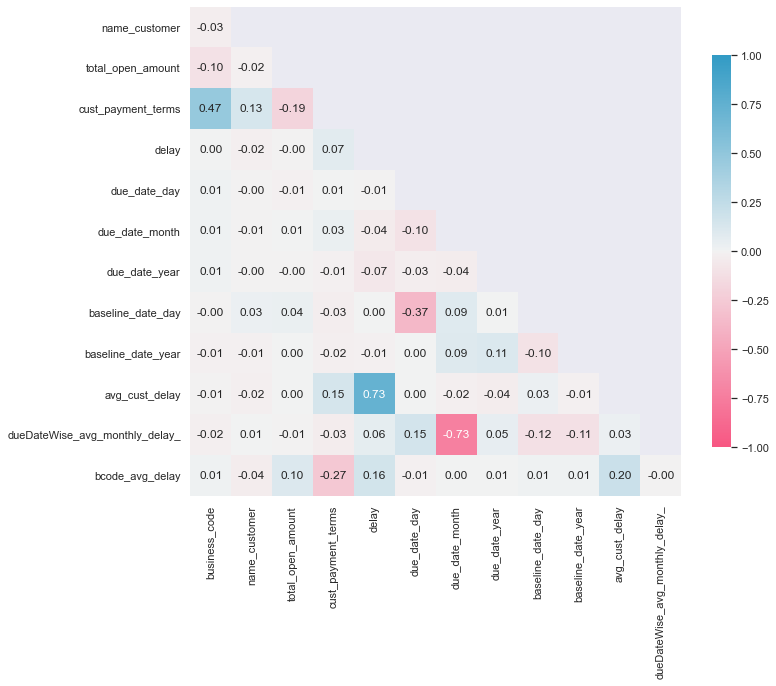

In [352]:
fig, ax = plt.subplots(figsize=(11, 9))
df_corr=X_train.corr()
# mask
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
# adjust mask and df
mask = mask[1:, :-1]
corr = df_corr.iloc[1:,:-1].copy()
# color map
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
# plot heatmap
sns.heatmap(corr,cmap=cmap,mask=mask, annot=True, fmt=".2f",vmin=-1, vmax=1, cbar_kws={"shrink": .8})
# yticks
plt.yticks(rotation=0)
plt.show()

In [353]:
#due_date_month and dueDateWise_avg_monthly_delay_ has correlation, dropping one column
X_train.drop("dueDateWise_avg_monthly_delay_",axis=1,inplace=True)

In [354]:
x_val1.drop("dueDateWise_avg_monthly_delay_",axis=1,inplace=True)

In [355]:
x_val2.drop("dueDateWise_avg_monthly_delay_",axis=1,inplace=True)

In [356]:
X_train.drop("cust_number",axis=1,inplace=True)
X_train.head()

,business_code,name_customer,clear_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,delay,due_date_day,due_date_month,due_date_year,baseline_date_day,baseline_date_year,avg_cust_delay,amount_bins,bcode_avg_delay
0,1,3284,2019-01-15,2018-12-30,2019-01-14,11598.0540,2018-12-30,38,1,14,1,2019,30,2018,1.303571,2,0.519311
1,1,426,2019-01-15,2018-12-30,2019-01-14,25.8804,2018-12-30,22,1,14,1,2019,30,2018,0.788732,1,0.519311
2,1,4114,2019-01-15,2018-12-30,2019-01-14,268.3278,2018-12-30,38,1,14,1,2019,30,2018,-2.171470,1,0.519311
3,1,2381,2019-02-01,2018-12-30,2019-01-31,17765.2800,2018-12-30,15,1,31,1,2019,30,2018,2.583333,3,0.519311
4,1,3801,2019-01-18,2018-12-30,2019-01-14,9346.4202,2018-12-30,22,4,14,1,2019,30,2018,2.794118,2,0.519311


In [357]:
x_val1.drop("cust_number",axis=1,inplace=True)
x_val2.drop("cust_number",axis=1,inplace=True)
test.drop("cust_number",axis=1,inplace=True)

In [358]:
test.shape

(9959, 14)

In [359]:
x_val1.shape, x_val2.shape

((3424, 17), (3424, 18))

In [360]:
for i in X_train.columns:
  if X_train[i].dtype=="datetime64":
    X_train.i=X_train.i.map(datetime.datetime.toordinal)

In [361]:
X_train.head(3)

,business_code,name_customer,clear_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,delay,due_date_day,due_date_month,due_date_year,baseline_date_day,baseline_date_year,avg_cust_delay,amount_bins,bcode_avg_delay
0,1,3284,2019-01-15,2018-12-30,2019-01-14,11598.0540,2018-12-30,38,1,14,1,2019,30,2018,1.303571,2,0.519311
1,1,426,2019-01-15,2018-12-30,2019-01-14,25.8804,2018-12-30,22,1,14,1,2019,30,2018,0.788732,1,0.519311
2,1,4114,2019-01-15,2018-12-30,2019-01-14,268.3278,2018-12-30,38,1,14,1,2019,30,2018,-2.171470,1,0.519311


In [362]:
X_train.dtypes

business_code                      int32
name_customer                      int32
clear_date                datetime64[ns]
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
total_open_amount                float64
baseline_create_date      datetime64[ns]
cust_payment_terms                 int32
delay                              int32
due_date_day                       int64
due_date_month                     int64
due_date_year                      int64
baseline_date_day                  int64
baseline_date_year                 int64
avg_cust_delay                   float64
amount_bins                     category
bcode_avg_delay                  float64
dtype: object

In [363]:
X_train.shape

(33045, 17)

In [364]:
x_val1.shape

(3424, 17)

In [365]:
x_val2.shape

(3424, 18)

**Creating a baseline model for the data**

In [366]:
y=X_train['delay']
X_pass=X_train.drop('clear_date',axis=1)

In [367]:
X_pass.drop(['document_create_date.1','due_in_date','baseline_create_date','delay'],axis=1,inplace=True)#datetime objects

In [368]:
#train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X_pass,y,test_size=0.2)

In [394]:
xtrain

,business_code,name_customer,total_open_amount,cust_payment_terms,due_date_day,due_date_month,due_date_year,baseline_date_day,baseline_date_year,avg_cust_delay,amount_bins,bcode_avg_delay
28463,1,4110,367.8168,38,26,10,2019,11,2019,-2.010959,1,0.519311
1543,1,824,3109.8366,24,2,2,2019,18,2019,1.373134,1,0.519311
6641,1,4113,634.3038,38,26,3,2019,11,2019,-2.200809,1,0.519311
4259,1,2418,12374.0604,22,2,3,2019,15,2019,3.500000,2,0.519311
23447,1,4110,99.9648,38,7,9,2019,23,2019,-2.010959,1,0.519311
...,...,...,...,...,...,...,...,...,...,...,...,...
19848,1,3283,62858.2500,38,1,8,2019,17,2019,0.065934,4,0.519311
27468,1,3629,120592.1574,22,16,10,2019,1,2019,1.268293,4,0.519311
10886,1,422,223.1502,22,3,5,2019,18,2019,0.712871,1,0.519311
6580,1,2171,654.0456,71,9,3,2019,9,2019,47.142857,1,0.519311


In [395]:
xtest

,business_code,name_customer,total_open_amount,cust_payment_terms,due_date_day,due_date_month,due_date_year,baseline_date_day,baseline_date_year,avg_cust_delay,amount_bins,bcode_avg_delay
23771,1,81,11222.7882,68,9,11,2019,26,2019,-10.600000,2,0.519311
20558,1,1986,2438.9508,22,8,8,2019,24,2019,0.416667,1,0.519311
22609,1,2909,11156.5818,22,30,8,2019,15,2019,-1.937500,2,0.519311
19019,1,3301,106002.0078,22,24,7,2019,9,2019,0.846154,4,0.519311
12947,1,2665,478.1244,28,8,7,2019,9,2019,5.666667,1,0.519311
...,...,...,...,...,...,...,...,...,...,...,...,...
13399,1,3636,44023.2624,22,29,5,2019,14,2019,2.000000,4,0.519311
16488,1,2163,13819.2054,71,13,6,2019,13,2019,40.743590,3,0.519311
18836,1,4194,3357.9780,22,22,7,2019,7,2019,-8.285714,1,0.519311
25618,1,829,11921.8164,24,28,9,2019,13,2019,-0.328947,2,0.519311


In [369]:
#linear regession 
from sklearn.linear_model import LinearRegression
reg = LinearRegression(normalize=True)
reg.fit(xtrain,ytrain)
print("Training complete.")

Training complete.


In [370]:
accuracy = reg.score(xtest,ytest)
print(accuracy*100,'%')

52.55774913067492 %


In [371]:
y_pred=reg.predict(xtest)
from sklearn.metrics import mean_squared_error
mean_squared_error(ytest, y_pred)

59.49741148996876

In [372]:
from sklearn.metrics import r2_score 
r2_score(ytest,y_pred)

0.5255774913067492

### Implementing our final model

In [373]:
X_new=X_train.drop(['clear_date','document_create_date.1','due_in_date','baseline_create_date','delay'],axis=1)#datetime objects

In [374]:
X_new.shape

(33045, 12)

In [375]:
y_new=y=X_train['delay']
y_val1=x_val1['delay']
y_val2=x_val2['delay']

In [376]:
x_val1=x_val1.drop(['clear_date','document_create_date.1','due_in_date','baseline_create_date','delay'],axis=1)#datetime objects

In [377]:
x_val1.shape

(3424, 12)

In [378]:
x_val2=x_val2.drop(['clear_date','document_create_date.1','due_in_date','baseline_create_date','index','delay'],axis=1)#datetime objects

In [379]:
x_val2.shape

(3424, 12)

In [380]:
xtrain1,xtest1,ytrain1,ytest1=train_test_split(X_pass,y,test_size=0.2)

In [381]:
xtrain2,xtest2,ytrain2,ytest2=train_test_split(X_pass,y,test_size=0.2)

In [382]:
test=test.drop(['clear_date','document_create_date.1','due_in_date','baseline_create_date','index'],axis=1)#datetime objects

In [383]:
test.shape

(9959, 9)

## Implementation of Linear Regression

In [384]:
#linear regession 
reg = LinearRegression(normalize=True)
reg.fit(X_new,y_new)
print("Training complete.")

Training complete.


In [385]:
acc1= reg.score(xtest1,ytest1)
print(acc1*100,'%')

48.026445265835505 %


In [386]:
acc2= reg.score(xtest2,ytest2)
print(acc1*100,'%')

48.026445265835505 %


In [387]:
y_pred1=reg.predict(xtest1)
from sklearn.metrics import mean_squared_error
mean_squared_error(ytest1, y_pred1)

68.50690619165802

In [388]:
y_pred2=reg.predict(xtest2)
from sklearn.metrics import mean_squared_error
mean_squared_error(ytest2, y_pred2)

52.408346981305634

## Implementation of Ridge Regression

In [389]:
from sklearn.linear_model import Ridge
rr = Ridge(alpha=0.01)
rr.fit(X_new, y_new) 
pred_train_rr= rr.predict(X_new)
print(np.sqrt(mean_squared_error(y_new,pred_train_rr)))
print(r2_score(y_new, pred_train_rr))

pred_test_rr= rr.predict(xtest1)
print(np.sqrt(mean_squared_error(ytest1,pred_test_rr))) 
print(r2_score(ytest1, pred_test_rr))

7.7031745154209075
0.541253642853454
8.276893392524126
0.4802640123346016


In [390]:
acc1= rr.score(xtest1,ytest1)
print(acc1*100,'%')

48.026401233460156 %


In [391]:
acc2= rr.score(xtest2,ytest2)
print(acc1*100,'%')

48.026401233460156 %


## Implementation of Elastic Net

In [392]:
#Elastic Net
from sklearn.linear_model import ElasticNet
model_enet = ElasticNet(alpha = 0.01)
model_enet.fit(X_new, y_new) 
pred_train_enet= model_enet.predict(X_new)
print(np.sqrt(mean_squared_error(y_new,pred_train_enet)))
print(r2_score(y_new, pred_train_enet))

pred_test_enet= model_enet.predict(xtest1)
print(np.sqrt(mean_squared_error(ytest1,pred_test_enet)))
print(r2_score(ytest1, pred_test_enet))

7.717427340402489
0.5395544783326707
8.285873628247913
0.479135597736127


In [393]:
acc1= model_enet.score(xtest1,ytest1)
print(acc1*100,'%')

47.913559773612704 %
